In [1]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip


--2022-06-05 07:23:10--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.88
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  45.5MB/s    in 3.3s    

2022-06-05 07:23:14 (45.5 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [2]:
!pip install -q tflite-model-maker


     |████████████████████████████████| 642 kB 33.4 MB/s 
     |████████████████████████████████| 42.5 MB 1.7 MB/s 
     |████████████████████████████████| 77 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 53.0 MB/s 
     |████████████████████████████████| 6.4 MB 69.4 MB/s 
     |████████████████████████████████| 10.9 MB 27.7 MB/s 
     |████████████████████████████████| 120 kB 72.7 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
     |████████████████████████████████| 237 kB 58.1 MB/s 
     |████████████████████████████████| 3.4 MB 52.0 MB/s 
     |████████████████████████████████| 596 kB 53.7 MB/s 
     |████████████████████████████████| 840 kB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 47.8 MB 1.7 MB/s 
     |████████████████████████████████| 99 kB 10.1 MB/s 
     |████████████████████████████████| 352 kB 48.7 MB/s 
     |████████████

In [3]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt

In [4]:
dataset_path='/content/Lung_cancer_dataset/Train'
image_path=dataset_path
data = DataLoader.from_folder(image_path)
#train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1077, num_label: 3, labels: Benign cases, Malignant cases, Normal cases.


In [5]:
#model = image_classifier.create(train_data)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)
#model = image_classifier.create(train_data, validation_data=validation_data, epochs=5)
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data,epochs=10)



INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


26/26 [==============================] - 24s 393ms/step - loss: 0.8245 - accuracy: 0.7272 - val_loss: 0.6248 - val_accuracy: 0.8796
Epoch 2/10
26/26 [==============================] - 10s 386ms/step - loss: 0.6044 - accuracy: 0.8558 - val_loss: 0.4911 - val_accuracy: 0.8889
Epoch 3/10
26/26 [==============================] - 10s 388ms/step - loss: 0.5017 - accuracy: 0.9075 - val_loss: 0.4874 - val_accuracy: 0.9074
Epoch 4/10
26/26 [==============================] - 10s 390ms/step - loss: 0.4773 - accuracy: 0.9099 - val_loss: 0.4714 - val_accuracy: 0.8889
Epoch 5/10
26/26 [==============================] - 10s 389ms/step - loss: 0.4644 - accuracy: 0.9243 - val_loss: 0.4643 - val_accuracy: 0.8889
Epoch 6/10
26/26 [==============================] - 10s 387ms/step - loss: 0.4567 - accuracy: 0.9291 - val_loss: 0.4661 - val_accuracy: 0.8889
Epoch 7/10
26/26 [==============================] - 10s 390ms/step - loss: 0.4457 - accuracy: 0.9351 - val_loss: 0.4518 - val_accuracy: 0.9074
Epoch 8/10

In [6]:
loss, accuracy = model.evaluate(test_data)


4/4 [==============================] - 3s 218ms/step - loss: 0.4244 - accuracy: 0.9259


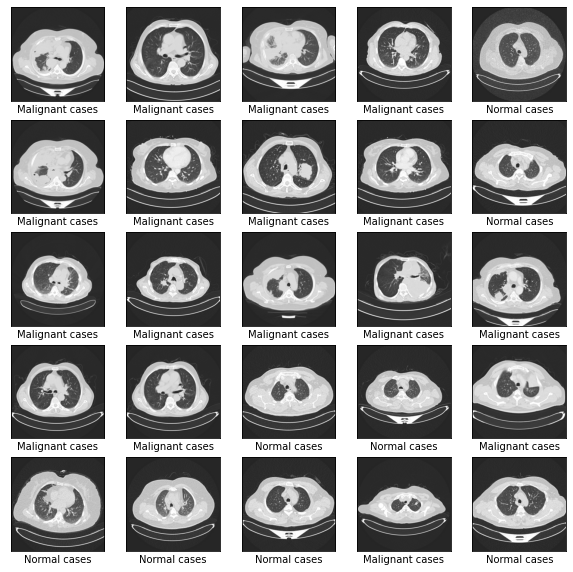

In [7]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

ValueError: ignored

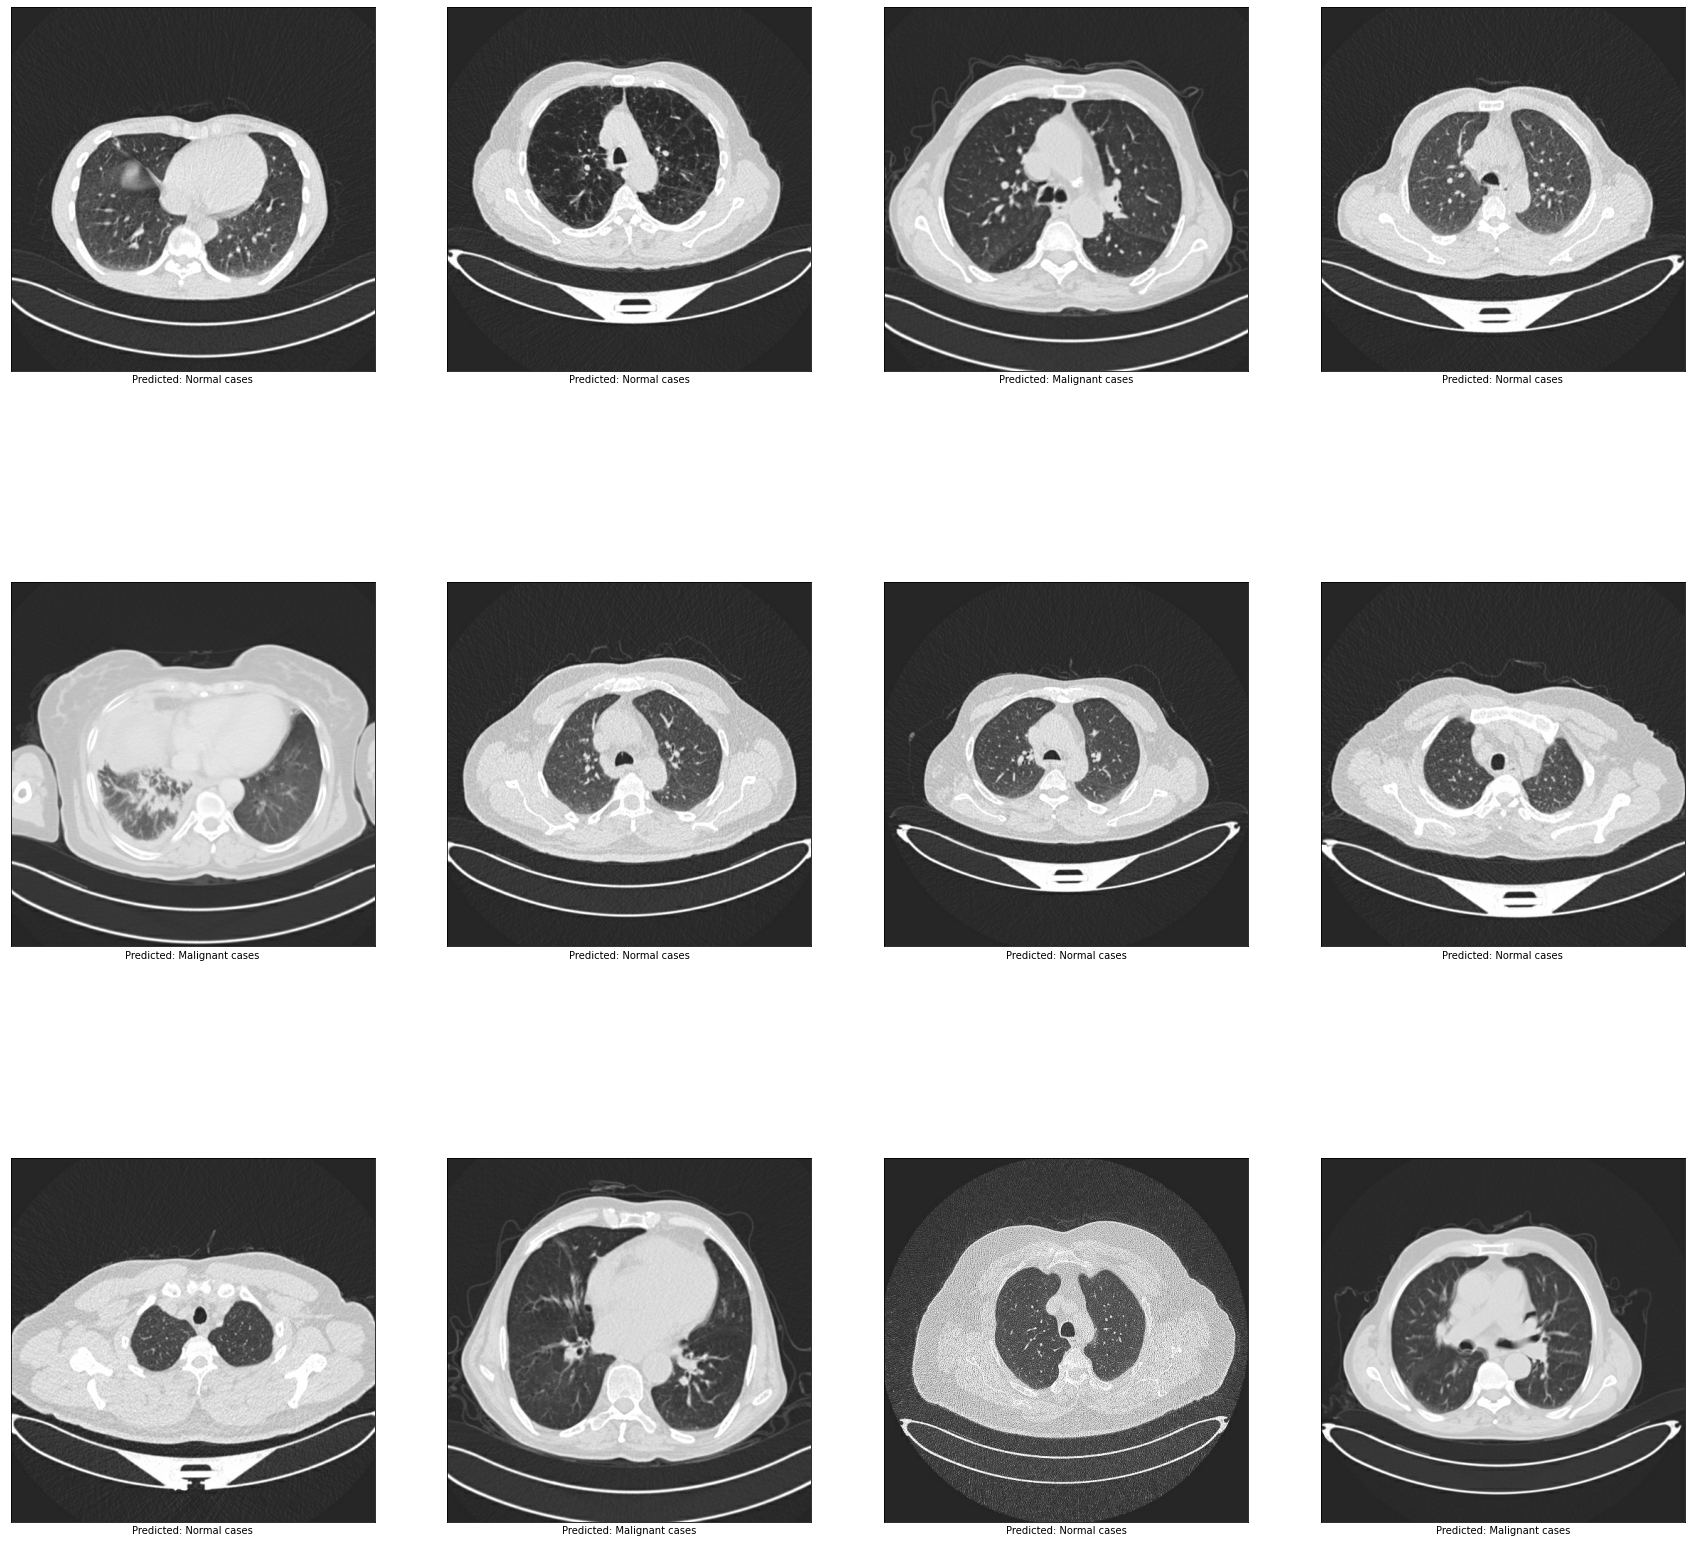

In [13]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(30, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(3, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [14]:
model.export(export_dir='/content/model16', export_format=ExportFormat.LABEL)
config = QuantizationConfig.for_float16()
model.export(export_dir='/content/model16', tflite_filename='model_lung_cancer.tflite', quantization_config=config)

INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Assets written to: /tmp/tmp9fx1_aza/assets


INFO:tensorflow:Assets written to: /tmp/tmp9fx1_aza/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpsyeed_9s/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpsyeed_9s/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_lung_cancer.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_lung_cancer.tflite
